In [9]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter1d

In [2]:
# Some constants
ndir = 10 # Number of directions from peeling off

In [3]:
# Load in the data
df = pd.read_csv("../data/all_basic_data.csv")
df_lya = pd.read_csv("../data/lya_spec_prof.csv")
df_ha = pd.read_csv("../data/ha_spec_prof.csv")

In [4]:
# Merge the dataframes
df = pd.merge(df, df_ha,  how='left', left_on=['halo_id','redshift'], right_on = ['halo_id','redshift'],suffixes=("_x","_y"))
df = pd.merge(df, df_lya,  how='left', left_on=['halo_id','redshift'], right_on = ['halo_id','redshift'],suffixes=("_a","_b"))

# Drop rows with nan in spec -- i.e. all redshifts not 6, 5, or 4.64
df = df[df["lya_sbins_dir_9"].notna()]

In [5]:
df.head(n=10)

,n_stars,stellar_mass,stellar_metallicity,ionizing_luminosity,f_esc,sfr_10,sfr_100,mvir,rvir,redshift,...,lya_dir_8,lya_prof_dir_8,lya_pbins_dir_8,lya_spec_dir_8,lya_sbins_dir_8,lya_dir_9,lya_prof_dir_9,lya_pbins_dir_9,lya_spec_dir_9,lya_sbins_dir_9
428,130394.0,7.683378,-3.075545,52.941174,-2.171260,0.42,0.18,9.655074,0.002542,6.0,...,3.377993e+40,"[2.185762511309597e+33, 8.657223717145478e+32,...","[7.262317064571429, 21.786951193714287, 36.311...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1165.72, 1165.8200000000002, 1165.92, 1166.02...",8.598346e+40,"[5.791658332419e+33, 4.1356946473156173e+33, 4...","[7.262317064571429, 21.786951193714287, 36.311...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1165.72, 1165.8200000000002, 1165.92, 1166.02..."
429,74908.0,7.589946,-3.566279,52.955714,-0.761542,0.39,0.37,9.385045,0.002065,6.0,...,7.005934e+41,"[6.606000026256524e+34, 3.7911242171866484e+34...","[5.900664255142858, 17.701992765428574, 29.503...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1165.72, 1165.8200000000002, 1165.92, 1166.02...",5.464315e+41,"[4.474163535489801e+34, 2.929517900969731e+34,...","[5.900664255142858, 17.701992765428574, 29.503...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1165.72, 1165.8200000000002, 1165.92, 1166.02..."
430,578331.0,8.400477,-3.083791,53.165083,-2.275422,0.54,0.91,10.419300,0.004575,6.0,...,1.608231e+41,"[7.737616475447948e+33, 3.610734072694334e+33,...","[13.070204960571429, 39.210614881714285, 65.35...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1165.72, 1165.8200000000002, 1165.92, 1166.02...",1.875402e+41,"[2.6986311110740056e+33, 2.772250488065353e+33...","[13.070204960571429, 39.210614881714285, 65.35...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1165.72, 1165.8200000000002, 1165.92, 1166.02..."
431,159227.0,7.783810,-3.270219,53.165171,-2.556512,0.50,0.08,9.782129,0.002802,6.0,...,6.527566e+40,"[9.779698052224618e+32, 3.157153256562363e+33,...","[8.004452102, 24.013356306, 40.022260509999995...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1165.72, 1165.8200000000002, 1165.92, 1166.02...",4.599715e+41,"[8.732139718052367e+36, 6.638128102300573e+36,...","[8.004452102, 24.013356306, 40.022260509999995...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1165.72, 1165.8200000000002, 1165.92, 1166.02..."
432,658605.0,8.426257,-2.959127,53.314255,-1.540508,0.88,0.74,10.173441,0.003784,6.0,...,1.511093e+42,"[1.8308614440833615e+35, 1.0970664163644551e+3...","[10.810603520571428, 32.431810561714286, 54.05...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1165.72, 1165.8200000000002, 1165.92, 1166.02...",6.436113e+41,"[4.269964792836539e+34, 2.9959506957518004e+34...","[10.810603520571428, 32.431810561714286, 54.05...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1165.72, 1165.8200000000002, 1165.92, 1166.02..."
433,255246.0,8.030900,-3.285637,53.385447,-2.429220,0.62,0.37,10.155114,0.003732,6.0,...,8.712205e+40,"[2.198022493391636e+32, 1.1630291781191856e+33...","[10.66420826, 31.99262478, 53.321041300000005,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1165.72, 1165.8200000000002, 1165.92, 1166.02...",8.020132e+40,"[2.3936966986021823e+31, 8.747706490684967e+31...","[10.66420826, 31.99262478, 53.321041300000005,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1165.72, 1165.8200000000002, 1165.92, 1166.02..."
434,16388.0,6.828284,-3.562171,53.156287,-10.000000,0.35,0.05,9.163315,0.001742,6.0,...,5.382813e+40,"[6.564435858438379e+33, 3.7451774534665014e+33...","[4.978349898, 14.935049694, 24.891749490000002...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1165.72, 1165.8200000000002, 1165.92, 1166.02...",6.720029e+40,"[2.666837752682378e+34, 2.9126492131108094e+34...","[4.978349898, 14.935049694, 24.891749490000002...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1165.72, 1165.8200000000002, 1165.92, 1166.02..."
435,119846.0,7.783444,-3.136695,54.092

In [6]:
# Min and max wavelengths for lya and ha spectra
lya_lmin = 1165.67; lya_lmax = 1265.67
ha_lmin = 6512.8; ha_lmax = 6612.8

Text(0.5, 0, '${\\rm Wavelength\\ [\\AA]}$')

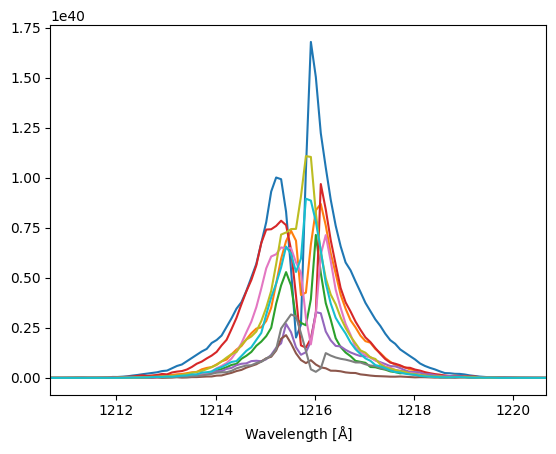

In [7]:
# Make a plot of the Lya spectra of the first galaxy
# Note that the units are erg/s in the spectral bin which is 0.1A
# Data is stored as a list embedded in a string...this was a stupid decision on my end
# Need to convert with ast.literal.eval
gal_1 = df.index[0]

for i in range(ndir):
    plt.plot(
        ast.literal_eval(df[f"lya_sbins_dir_{i}"].iloc[gal_1]),
        ast.literal_eval(df[f"lya_spec_dir_{i}"].iloc[gal_1]))
    
plt.xlim(1215.67-5,1215.67+5)
plt.xlabel(r"${\rm Wavelength\ [\AA]}$")

Text(0.5, 0, '${\\rm Wavelength\\ [\\AA]}$')

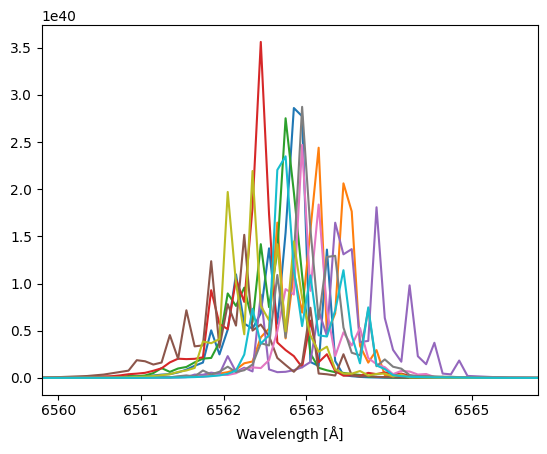

In [8]:
# Do the same for Halpha
# Note that the units are erg/s in the spectral bin which is 0.1A
gal_1 = df.index[0]

for i in range(ndir):
    plt.plot(
        ast.literal_eval(df[f"ha_sbins_dir_{i}"].iloc[gal_1]),
        ast.literal_eval(df[f"ha_spec_dir_{i}"].iloc[gal_1]))
    
plt.xlim(6562.8-3,6562.8+3)
plt.xlabel(r"${\rm Wavelength\ [\AA]}$")

Text(0.5, 1.0, '${\\rm H\\alpha\\ Spectra\\ With\\ LSF}$')

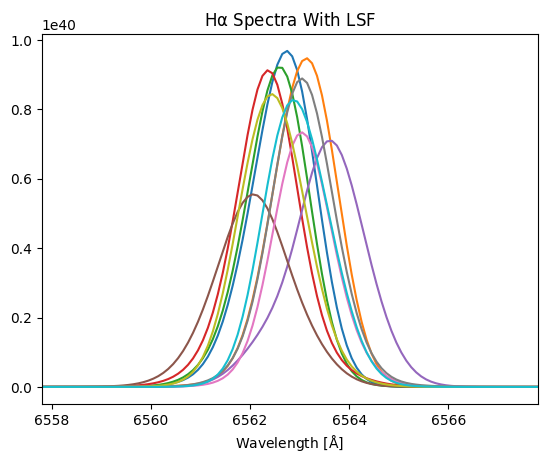

In [12]:
# All of the spectra were run at 0.1A resolution. We can make this plot convolving with a line spread function of 0.5A
# Then it starts to look more realistic :) 
gal_1 = df.index[0]

for i in range(ndir):
    plt.plot(
        ast.literal_eval(df[f"ha_sbins_dir_{i}"].iloc[gal_1]),
        gaussian_filter1d(np.array(ast.literal_eval(df[f"ha_spec_dir_{i}"].iloc[gal_1])),5)
    )
    
plt.xlim(6562.8-5,6562.8+5)
plt.xlabel(r"${\rm Wavelength\ [\AA]}$")
plt.title(r"${\rm H\alpha\ Spectra\ With\ LSF}$")